In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We have data to find Happiness Score. First we Import with the help of READ_CSV method. It is a Numerical Continues data. 

# Exploratory Data Analysis EDA

In [3]:
df.shape

(158, 12)

there is 158 rows and 12 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

With help of df.info() we can find information about data for example: Columns Name, Number of rows and data type like as Object, int, float. 

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We the help of df.dtypes function we can collect details about data types like as Object, int, float.

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

With the help of above mentioned method we can find missing value that is present in data or NaN value. As we are getting there is no missing value.

<AxesSubplot:>

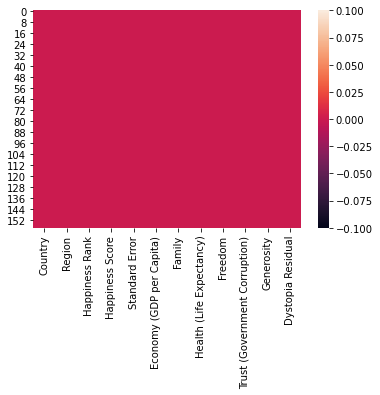

In [7]:
sns.heatmap(df.isnull())

sns.heatmap(df.isnull()) this function provide us how much missing value present in our data graphically and there are no missing value at present.

# Summary Statistics

In [8]:
#Summary Statistics
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Above mentioned function provide us statistical information about data.

In [9]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

All unique columns are present. There is no repetition.

In [10]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In Region column different different values come many many time and some values come 6 or less time.

# Data Visualization

Correlation  with or without filling numerical values

<AxesSubplot:>

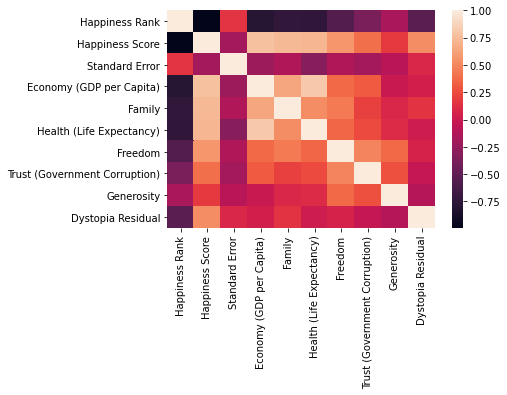

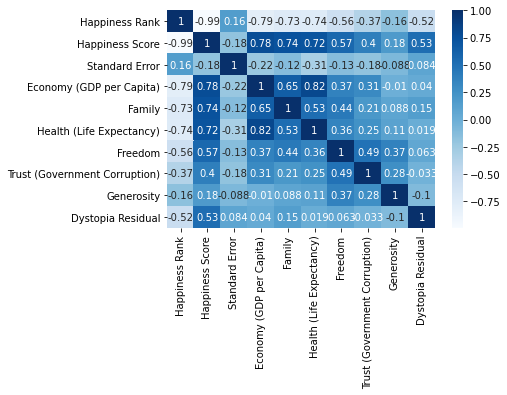

In [11]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
sns.color_palette?
sns.heatmap?
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Correlation Between all columns. With the help of correlation we can correlate one column with other one.

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Ploting Outliers by Box Plot

# Univariate Analysis

<AxesSubplot:>

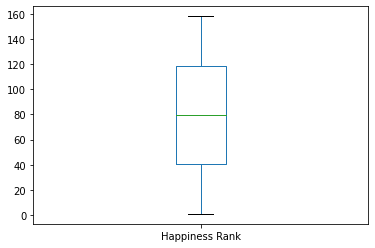

In [13]:
df['Happiness Rank'].plot.box()

No outliers present in  Happiness Rank column.

<AxesSubplot:>

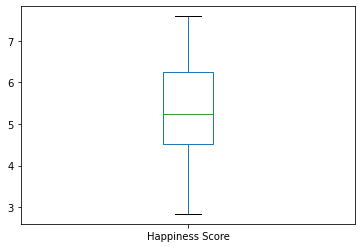

In [14]:
df['Happiness Score'].plot.box()

No outliers present in  Happiness Score column.

<AxesSubplot:>

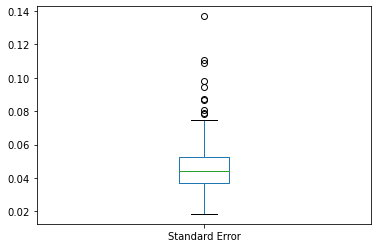

In [15]:
df['Standard Error'].plot.box()

Outliers is present in  Standard Error column.

<AxesSubplot:>

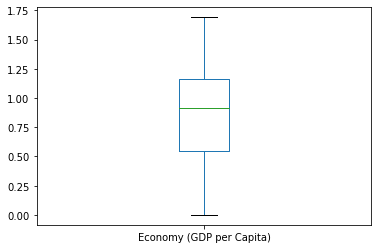

In [16]:
df['Economy (GDP per Capita)'].plot.box()

No outliers present in Economy(GDP per Capita) column.

<AxesSubplot:>

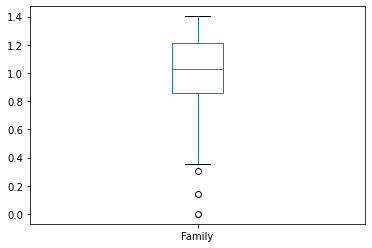

In [17]:
df['Family'].plot.box()

Outliers present in Family column.

<AxesSubplot:>

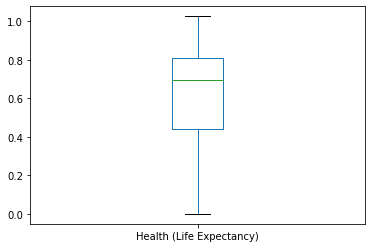

In [18]:
df['Health (Life Expectancy)'].plot.box()

No outliers present in Health(Life Expectancy) column.

<AxesSubplot:>

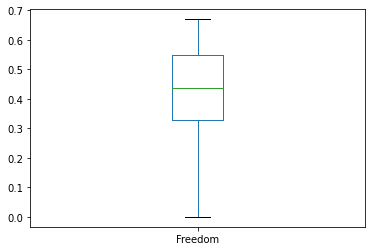

In [19]:
df['Freedom'].plot.box()

No outliers present in Freedom column.

<AxesSubplot:>

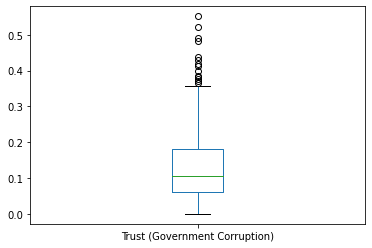

In [20]:
df['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

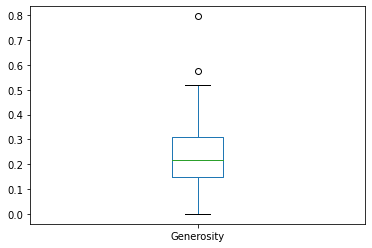

In [21]:
df['Generosity'].plot.box()

<AxesSubplot:>

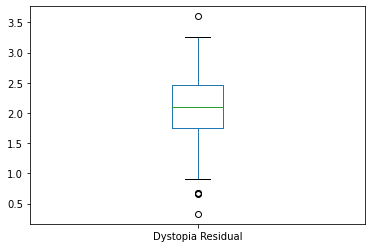

In [22]:
df['Dystopia Residual'].plot.box()

The Dystopia Residual column also has outliers.

# Bivariate Analysis

In [23]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

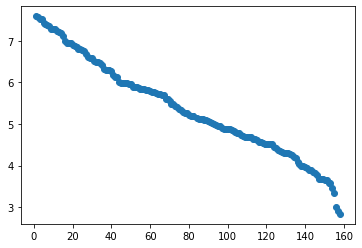

In [24]:
plt.scatter(df['Happiness Rank'],df['Happiness Score'])
plt.show()

With help of scatter plot we are getting relation between HAPPINESS RANK and HAPPINESS SCORE and it is showing negative relation.

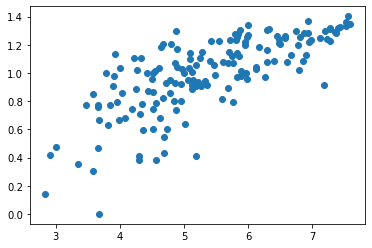

In [25]:
plt.scatter(df['Happiness Score'],df['Family'])
plt.show()

With help of scatter plot we are getting relation between HAPPINESS RANK and FAMILY and it is showing positive relation.

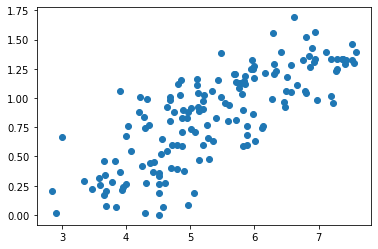

In [26]:
plt.scatter(df['Happiness Score'],df['Economy (GDP per Capita)'])
plt.show()

With help of scatter plot we are getting relation between Happiness Score and Economy (GDP per Capita) is quite good relation.

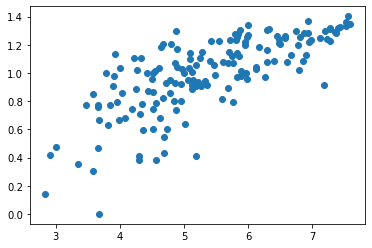

In [27]:
plt.scatter(df['Happiness Score'],df['Family'])
plt.show()

There is quite good relation between Happiness Score and Family.

In [28]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [29]:
dX = df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

Removing two categorical columns from final data and storing in "dX" vairiable.

# Multivariate Anaysis

In [30]:
collist=dX.columns.values
ncol=10
nrows=10

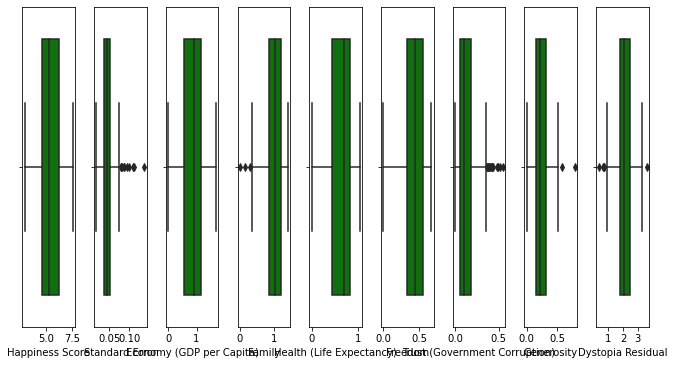

In [31]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(dX[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find outliers in a one diagram.

# Distribution of Skewness

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

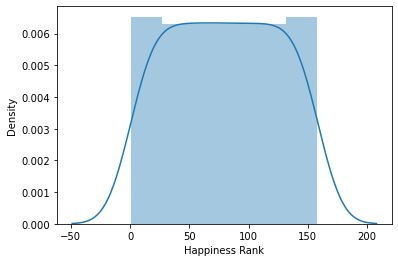

In [32]:
sns.distplot(df['Happiness Rank'])

In Happiness Rank all data Normaly Distributed. It is a symetrical data and also in Bell Shape Curve.

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

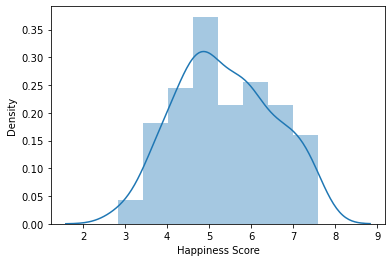

In [33]:
sns.distplot(df['Happiness Score'])

In Happiness Score data Normally Distributed.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

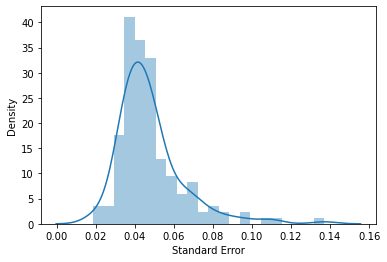

In [34]:
sns.distplot(df['Standard Error'])

The data not normally distributed and it is left trail skewness. 

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

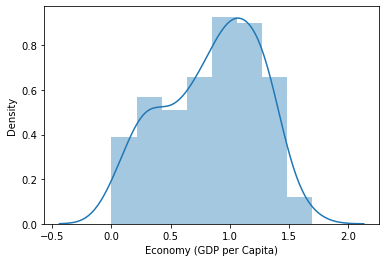

In [35]:
sns.distplot(df['Economy (GDP per Capita)'])

The data normally distributed and it is a symetrical data.

<AxesSubplot:xlabel='Family', ylabel='Density'>

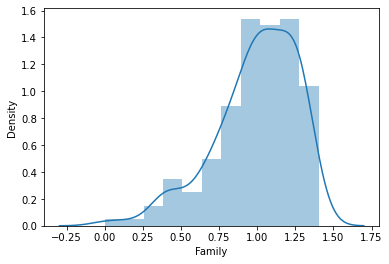

In [36]:
sns.distplot(df['Family'])

The data not normally distributed and it is right trail skewness.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

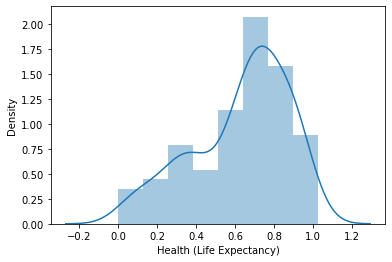

In [37]:
sns.distplot(df['Health (Life Expectancy)'])

Data not normally distributed and also in not bell shape curve.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

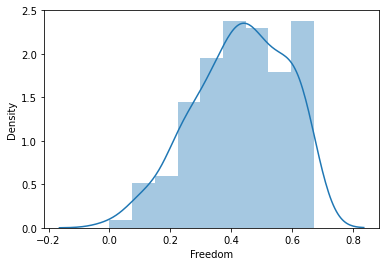

In [38]:
sns.distplot(df['Freedom'])

In Freedom column all data is normally distributed and also in bell shape curve.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

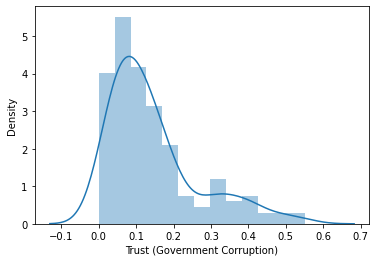

In [39]:
sns.distplot(df['Trust (Government Corruption)'])

Data is not normally distributed. It is Left trail skewness.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

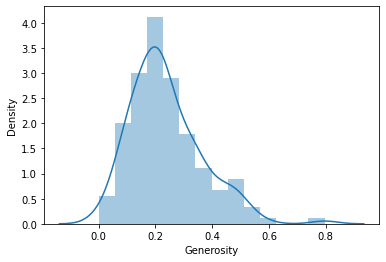

In [40]:
sns.distplot(df['Generosity'])

The data is not normally distributed.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

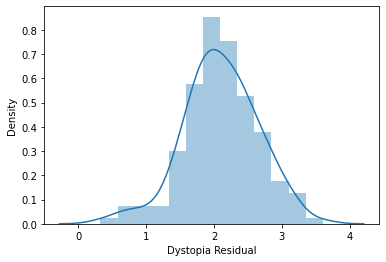

In [41]:
sns.distplot(df['Dystopia Residual'])

the data is normally distributed and also in bell shape curve.

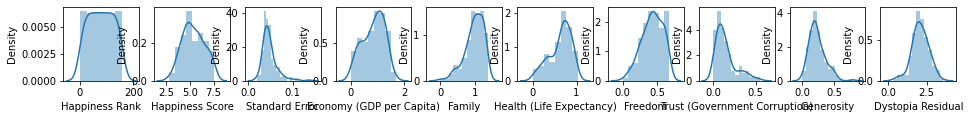

In [42]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df[collist[i]])

In [43]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

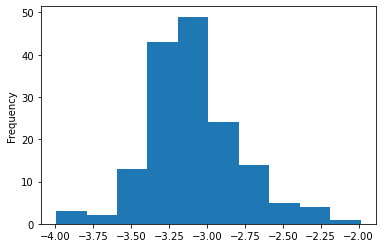

In [44]:
df['Standard Error']=np.log(df['Standard Error'])
df['Standard Error'].plot.hist()

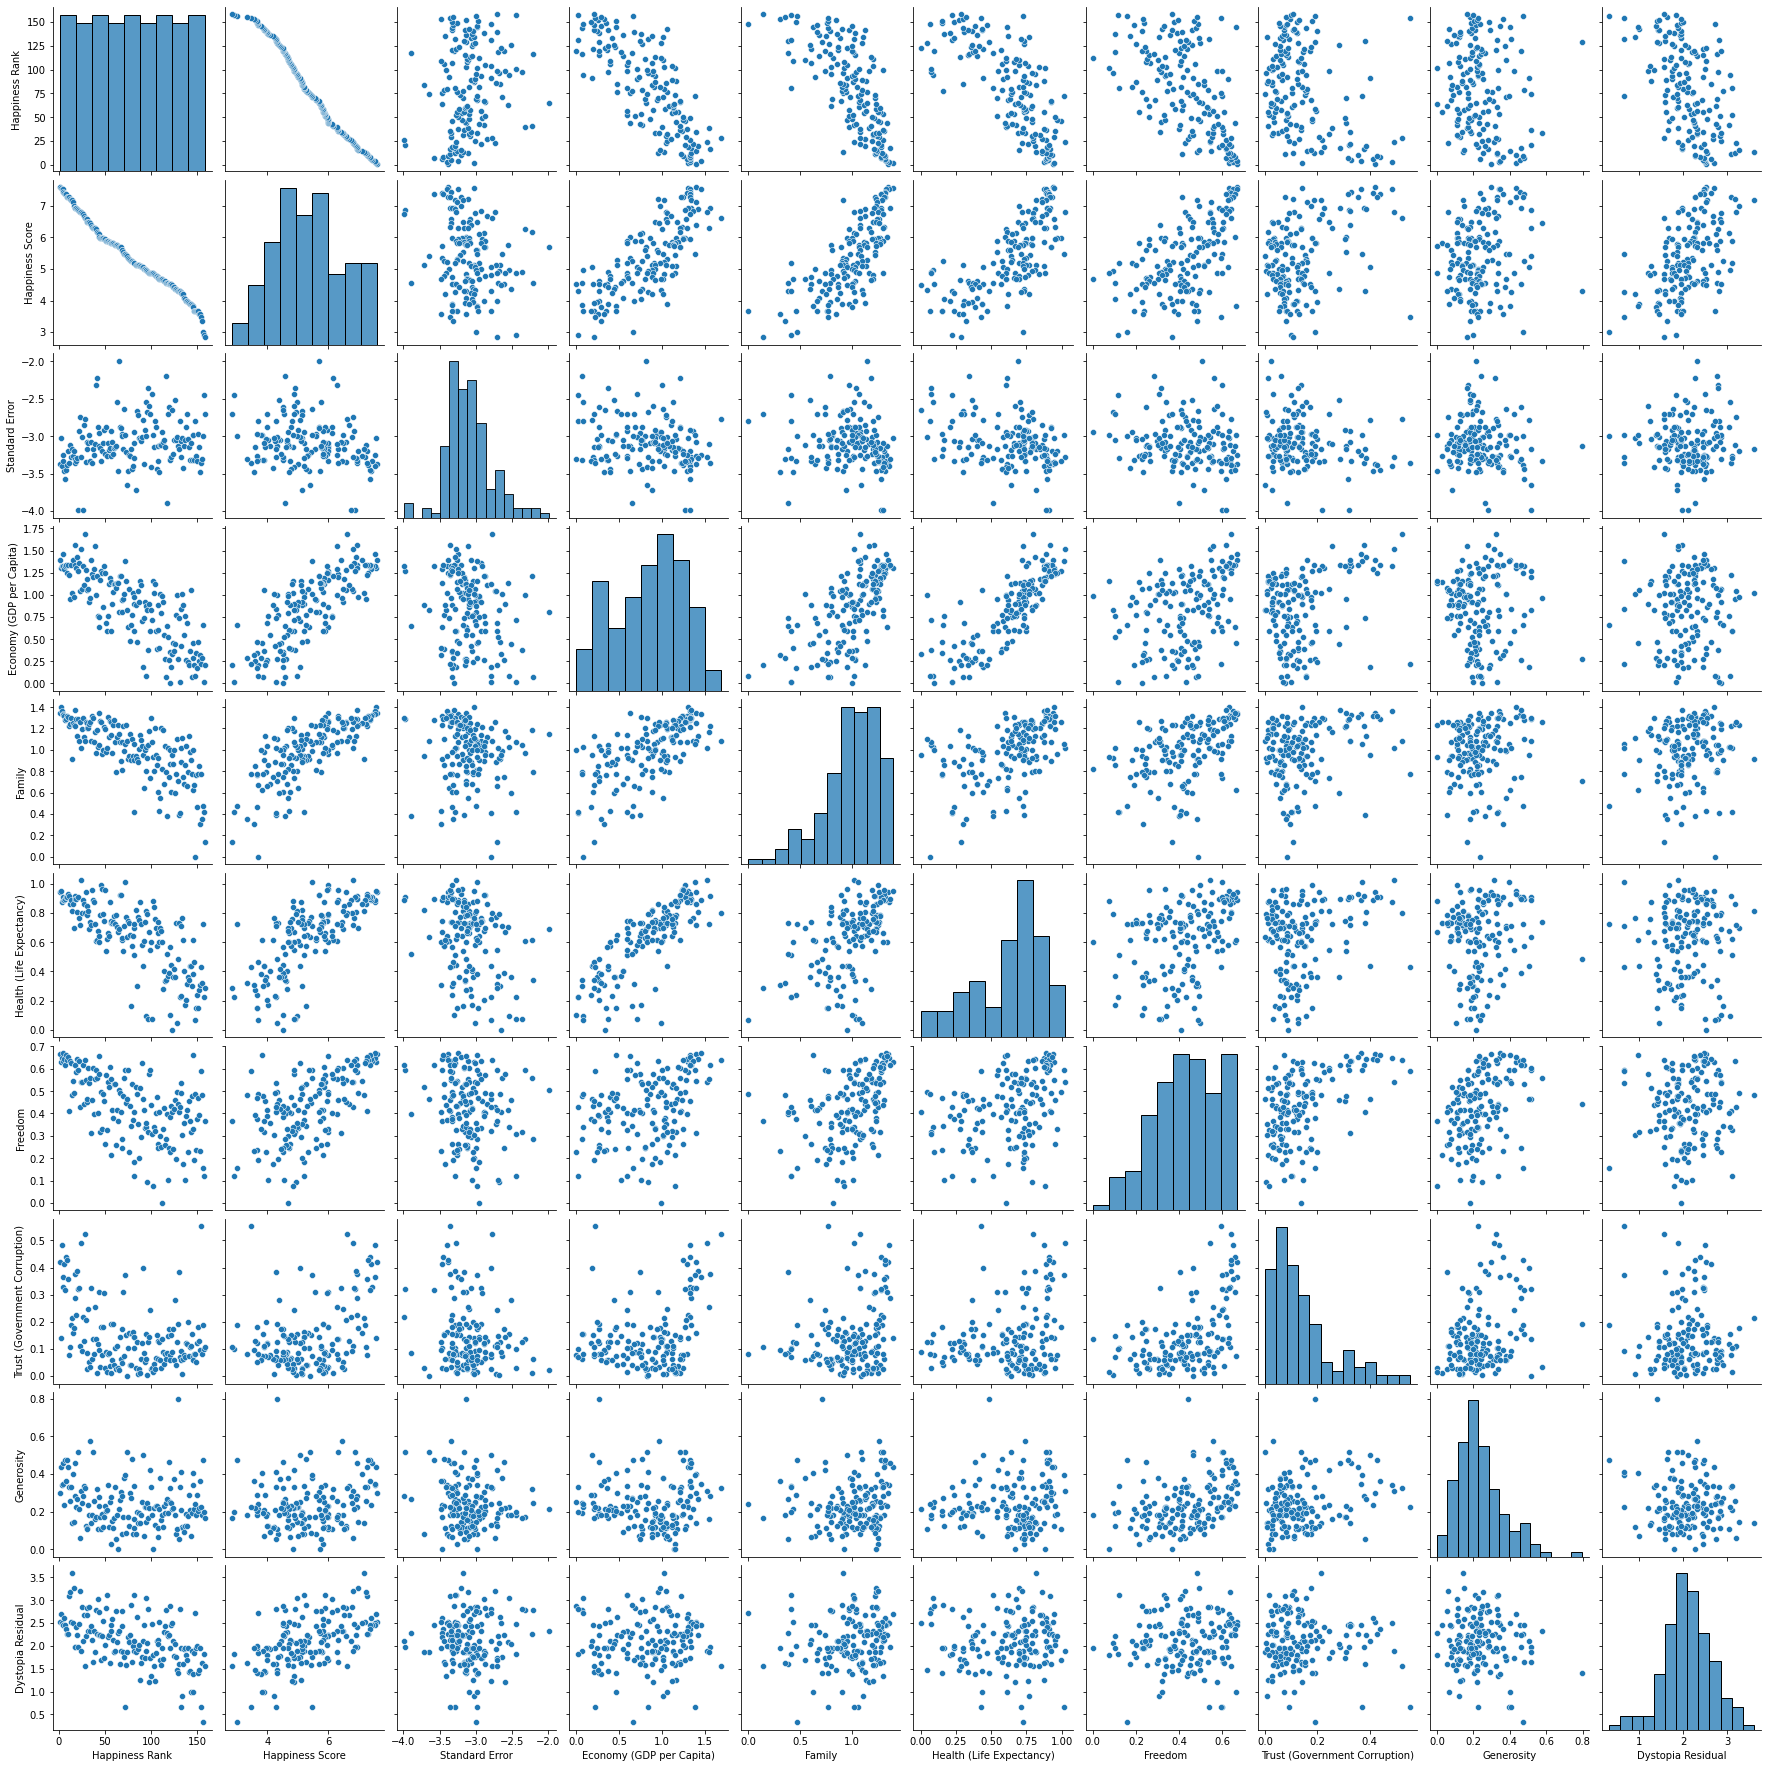

In [45]:
sns.pairplot(df)

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Region'] = labelencoder.fit_transform(df['Region'])
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,9,6,7.406,-3.460947,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,9,7,7.378,-3.575908,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,9,8,7.364,-3.455548,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,0,9,7.286,-3.389961,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,0,10,7.284,-3.198338,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Use LabelEncoder for categorical data

In [47]:
df.dtypes

Country                           object
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [48]:
df['Region']=df['Region'].astype(float,errors='raise')
df['Happiness Rank']=df['Happiness Rank'].astype(float,errors='raise')

Convert data type integer to float type.

In [49]:
df.dtypes

Country                           object
Region                           float64
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [50]:
df_final = df[['Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

Droping Categorical columns from main data for collecting numerical data.

In [51]:
df_final.dtypes

Region                           float64
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# ZSCORE VALUE

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(df_final))
z

array([[1.30025593, 1.72099989, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.69907456, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.67714922, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 1.67742676, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 1.69935209, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 1.72127743, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [54]:
threshold=3
print(np.where(z>3))

(array([ 27,  64, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  9,  5,  8, 10,  5], dtype=int64))


In [55]:
z[27][8]

3.1646194851713774

In [56]:
z[40][3]

2.7880680809766445

In [57]:
z[157][5]

3.1347248549706186

In [58]:
df_final_new=df_final[(z<3).all(axis=1)]
df_final_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,1.0,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9.0,2.0,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9.0,3.0,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9.0,4.0,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,5.0,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8.0,151.0,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8.0,152.0,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7.0,153.0,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8.0,155.0,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [59]:
df_final_new.shape

(151, 11)

In [89]:
#Shape of data after removing outliers. As we are getting 7 rows drops from df_final (main data) and after Zscore function we are loosing less data approx. 4.43 %. 
(7/158)*100

4.430379746835443

In [60]:
df_final.shape

(158, 11)

In [61]:
df_final_new.skew()

Region                          -0.097966
Happiness Rank                   0.003011
Happiness Score                  0.170109
Standard Error                   0.341173
Economy (GDP per Capita)        -0.402358
Family                          -0.805183
Health (Life Expectancy)        -0.727308
Freedom                         -0.396610
Trust (Government Corruption)    1.283142
Generosity                       0.641370
Dystopia Residual               -0.038429
dtype: float64

In [62]:
df_final_new.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [63]:
x=df_final_new[['Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]
x.shape

(151, 10)

In [64]:
y= df_final_new['Happiness Score']
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [65]:
y.shape

(151,)

Spliting the all data into x and y for model building.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [67]:
x_train.shape

(101, 10)

In [68]:
x_test.shape

(50, 10)

In [69]:
y_train.shape

(101,)

In [70]:
y_test.shape

(50,)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Building

# Linear Regression

In [72]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
lr.coef_

array([-2.01251898e-05, -7.64441759e-06, -4.41351123e-05,  9.99930619e-01,
        9.99664268e-01,  9.99117181e-01,  9.99326733e-01,  1.00005627e+00,
        9.99879508e-01,  9.99673165e-01])

In [74]:
lr.intercept_

0.0024966683600977646

In [75]:
lr.score(x_train,y_train)

0.999999931982359

In [76]:
pred=lr.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [5.25289987 6.9371962  5.12889265 5.14039356 3.6808218  6.47671272
 5.19377543 5.68854693 5.82826332 5.10149544 5.98374096 7.19962911
 6.298163   7.28405526 6.90142043 3.93077714 4.56464671 3.65519416
 5.82407237 4.03311616 6.50502841 5.1231425  6.66961862 4.07676988
 4.34993579 3.78078664 4.6333833  5.54837279 4.86724531 6.48513284
 6.81012834 6.98253447 4.33225144 7.22552061 4.2923755  5.87834816
 5.58866355 6.57489857 4.71474418 7.42684542 6.454619   6.00291227
 3.66728659 3.34008891 6.94617346 7.27752427 4.67736286 4.29675798
 5.26808178 4.57127842]
Actual Price,y_test


In [77]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 0.00024970089746153336
Mean squared error: 7.917372134093256e-08
Root Mean Squared error: 0.00028137825314144757
0.9999999424076406


Linear Regression Algorithm performing very good and the score is 99%.

# Ramdom Forest Regressor

In [78]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [79]:
rf.score(x_train,y_train)

0.9988923520995248

In [80]:
pred=rf.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [5.25451 6.89131 5.17126 5.20647 3.82539 6.36303 5.20368 5.67838 5.83421
 5.10738 5.97331 7.25377 6.28043 7.32216 6.89777 3.91572 4.55486 3.64333
 5.81569 4.00775 6.52271 5.11168 6.78074 4.19933 4.4099  3.90835 4.61752
 5.48355 4.87214 6.5034  6.806   7.08984 4.3722  7.17884 4.16576 5.87445
 5.56352 6.67916 4.72264 7.38309 6.32582 6.12267 3.64479 3.52001 7.01595
 7.24725 4.68065 4.20931 5.29486 4.56916]
Actual Price,y_test


In [81]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 0.047481200000000126
Mean squared error: 0.004469526763999983
Root Mean Squared error: 0.06685451939846687
0.9967487875063509


Random Forest Regressor Algorithm performing very good and the score is 99%.

# Decision Tree Regressor

In [82]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred=dtc.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [5.212 6.867 5.212 5.192 3.845 6.295 5.212 5.695 5.855 5.098 5.987 7.522
 6.295 7.119 6.853 3.995 4.518 3.587 5.759 3.956 6.574 5.192 6.574 4.252
 4.271 3.845 4.507 5.399 4.898 6.75  6.574 7.187 4.194 7.187 4.252 5.848
 5.605 6.798 4.739 7.286 6.295 6.123 3.587 3.575 6.853 7.187 4.686 4.271
 5.286 4.512]
Actual Price,y_test
error:
Mean absolute error: 0.09228000000000008
Mean squared error: 0.014290240000000003
Root Mean Squared error: 0.11954179185540094
0.989605027718043


Decision Tree Regressor Algorithm performing very good and the score is 98%.

# Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

As we know after deployment all algorithms they are performing very well but there may be Overfiting and underfiting case.
Remove Overfiting and UnderFiting we have to cross validate all algorithms.

In [91]:
from sklearn.linear_model import ElasticNet

In [94]:
Enr=ElasticNet(alpha=0.0001)
Enr.fit(x_train,y_train)
Enrpred=Enr.predict(x_test)
print(Enr.score(x_train,y_train))
Enr.coef_

0.9999724842701632


array([ 6.37530721e-04, -1.13870421e-03, -4.59199293e-03,  9.57681553e-01,
        9.53340824e-01,  9.44827472e-01,  9.52623941e-01,  9.57892043e-01,
        9.55398059e-01,  9.53580947e-01])

In [109]:
print(cross_val_score(rf,x,y,cv=5).mean())

-1.699953897920795


In [110]:
dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())

[-3.22240818 -0.29991161 -0.30974954 -0.64369178 -2.55092858]
-1.405337939976159 1.2342210781329346


# Hyper parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV

In [118]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(x_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(x_test) - y_test) ** 2))

r2 / variance :  0.9999998950233066
Residual sum of squares: 0.00


After hyper parameter tuining by GridSearchCV we find Liner Regression Algorithm showing highest score.

# Saving Model

In [119]:
joblib.dump(lr,'WorldHappinessReport.obj')

['WorldHappinessReport.obj']